In [1]:
from astropy import coordinates as coords
from astropy import units as u 
from astroquery.sdss import SDSS
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

In [3]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
result = SDSS.query_region(co, spectro=True, radius=2*u.arcsec)
spec = SDSS.get_spectra(matches=result)
print(spec)

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f8d1e2be410>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e6f3190>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e4db160>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e4dbaf0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e4f5780>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e4f7370>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e4fcdf0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e536a40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e53c6d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f8d1e53e2c0>]]


In [4]:
co = coords.SkyCoord('0h8m05.63s +14d50m23.3s')
spec = SDSS.get_spectra(coordinates=co)
spec[0][1].data

FITS_rec([(30.596626, 3.5797, 0.06440803, 0,        0, 1.2189666 , 8.154254 , 36.077015),
          (33.245728, 3.5798, 0.        , 0,        0, 1.2187515 , 7.656426 , 34.99724 ),
          (35.89512 , 3.5799, 0.06292833, 0,        0, 1.2185355 , 7.231167 , 35.379208),
          ...,
          (53.27969 , 3.9635, 0.2728394 , 0,        0, 0.64196426, 4.1553526, 50.13611 ),
          (50.236168, 3.9636, 0.2806295 , 0,        0, 0.64184296, 4.2312737, 50.03317 ),
          (51.702717, 3.9637, 0.18243204, 0, 33554432, 0.64171964, 4.3413963, 50.208874)],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [7]:
co = coords.SkyCoord('178h54m29.81s -00d46m14.20s')
spec = SDSS.get_spectra(coordinates=co)
spec[0][1].data

ValueError: Cannot parse first argument data "178h54m29.81s" for attribute ra

In [5]:
spec[0][2].data

FITS_rec([('sdss', 'SDSS', 'chunk24', 'legacy', 'dr2001.10.1', 'good', 18.0661, 0., 5000., -1, 0., -9999., -1, 1, 1, 0, 0, 0, 0, 0, '    845594848269461504', '1237652943176138868', '1237652943176138868', '         7470579384473', '845550867804350464', 1, 'dr7', '26', '', -1, 0.96604282, 0.03413061, 0.2561179, 113.21073, -28.737019, 'GALAXY', 'SCIENCE', 6240, 0, 6240, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 751, 515, 52251, 160, [1739,    0,    3,  315,  153], 2.0234369, 14.839836, 'QSO', 'BROADLINE', 0.04559058, 3.6422865e-05, 3.6396828, 3751, 1.5546794, 'spEigenQSO-53724.fits', [ 0,  1,  2,  3, -1, -1, -1, -1, -1, -1], 3, [ 2.1908362e-03,  3.4339433e-03, -6.1753937e-03,  8.5440716e-03, -5.8567975e+02,  1.4279556e+03, -8.0151349e+02,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00], 0., 0., 0., 0., 0., 0., 0, 3799.2686, 9198.14, 0.3758, 0, 31.981264, [10.666473, 26.243982, 39.083405, 39.87929 , 30.720493], 1.5515354, [0.51277274, 0.21740288, 0.0811602 , 0.03698776, 0.01995743, 0.01224

Text(0, 0.5, 'flux')

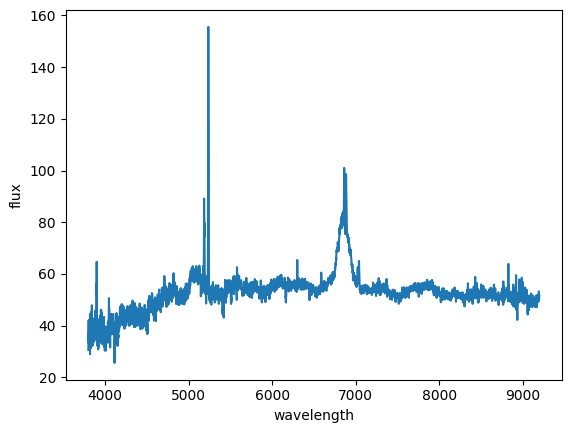

In [ ]:
data = spec[0][1].data
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [60]:
from astropy.io import fits
#fits_table_filename = fits.util.get_testdata_filepath('spec-0285-51930-0309.fits')

hdul = fits.open('spec-0285-51930-0309.fits')
#hdul.byteswap().newbyteorder()
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3807 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

Text(0, 0.5, 'flux')

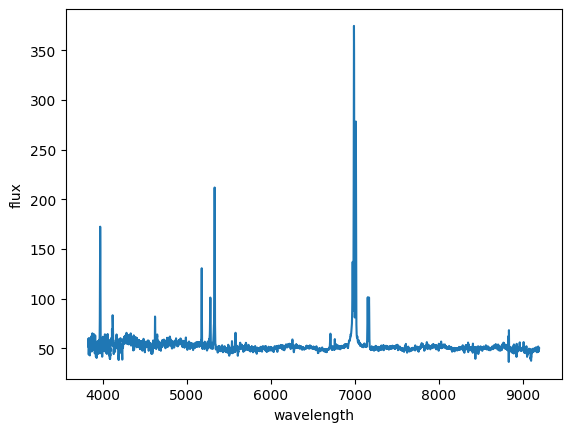

In [61]:
data = hdul[1].data
data.byteswap().newbyteorder()
plt.plot(10**data['loglam'],data['flux'])
plt.xlabel('wavelength')
plt.ylabel('flux')

In [62]:
import pandas as pd
lam = np.array(10**data['loglam'])
data_pd = {'lam': lam, 'flux': np.array(data['flux'])}
#location = 10**data['loglam']#
pdtable = pd.DataFrame(data_pd)
pdtable.head()

,lam,flux
0,3826.484131,55.312855
1,3827.366455,51.568661
2,3828.246826,59.850422
3,3829.129639,54.332668
4,3830.010498,54.771004


In [68]:
# age_range = df.loc[(df['Age'] >= 30) & (df['Age'] <= 40), 'Age']
noise_range = pdtable.loc[(pdtable['lam'] > 7500) & (pdtable['lam'] < 8500), 'lam']
#noise_range.index[0]
#noise_range.index[-1]
#noise_range = pdtable[pdtable["lam"] > 7500]
flux_noise = pdtable.loc[noise_range.index[0]: noise_range.index[-1], 'flux']
#pdtable['flux'].loc[noise_range.index[0]]


#noise_range_flux = pdtable.loc[(pdtable['lam'] > 7500) & (pdtable['lam'] < 8500), 'lam']
#pdtable.iloc[2923:3466]
#print(noise_range)
#data_pd['flux']


In [70]:
import numpy as np
flux_noise_std = np.std(flux_noise)
print(flux_noise_std)

1.885366
